# Eckovation Internship on INFOSYS Stock Price Prediction

 Submitted By Biklu Bora

### Importing Necessary Libraries 

In [1]:

import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime


import matplotlib.pyplot as plt
plt.style.use('ggplot') 
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


### Importing dataset

In [2]:
#read the file
df = pd.read_csv("INFY.csv")

#print the head
df.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1/3/2000,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026660e+12,NaN,NaN,NaN
1,1/4/2000,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352940e+13,NaN,NaN,NaN
2,1/5/2000,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598520e+14,NaN,NaN,NaN
3,1/6/2000,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185910e+14,NaN,NaN,NaN
4,1/7/2000,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960940e+12,NaN,NaN,NaN
5,1/10/2000,INFOSYSTCH,EQ,13125.50,13125.50,14175.50,12075.50,13750.00,13757.30,13270.60,236175,3.134180e+14,NaN,NaN,NaN
6,1/11/2000,INFOSYSTCH,EQ,13757.30,13200.00,13800.00,12656.75,12656.75,12656.75,12885.28,122331,1.576270e+14,NaN,NaN,NaN
7,1/12/2000,INFOSYSTCH,EQ,12656.75,11950.00,13349.00,11766.00,13010.00,13077.55,12873.99,203074,2.614370e+14,NaN,NaN,NaN
8,1/13/2000,INFOSYSTCH,EQ,13077.55,13100.00,13149.00,12031.35,12033.00,12090.60,12529.38,156550,1.961470e+14,NaN,NaN,NaN
9,1/14/2000,INFOSYSTCH,EQ,12090.60,12249.00,12297.00,11203.00,12170.00,12176.40,11896.77,125313,1.490820e+14,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5141 entries, 0 to 5140
Data columns (total 15 columns):
Date                  5141 non-null object
Symbol                5141 non-null object
Series                5141 non-null object
Prev Close            5141 non-null float64
Open                  5141 non-null float64
High                  5141 non-null float64
Low                   5141 non-null float64
Last                  5141 non-null float64
Close                 5141 non-null float64
VWAP                  5141 non-null float64
Volume                5141 non-null int64
Turnover              5141 non-null float64
Trades                2291 non-null float64
Deliverable Volume    4632 non-null float64
%Deliverble           4632 non-null float64
dtypes: float64(11), int64(1), object(3)
memory usage: 602.6+ KB


In [4]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [5]:
#Checking out the statistical measures
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5141.000000,5.141000e+03,5.141000e+03,2.291000e+03,4.632000e+03,4632.000000
mean,2628.606088,2628.838514,2671.242210,2582.234040,2625.734040,2625.972525,2626.861935,2.391975e+06,3.602431e+14,1.048378e+05,1.466766e+06,0.538395
std,1807.913136,1807.894306,1853.822825,1753.628312,1800.325882,1800.509848,1804.098898,3.957385e+06,3.418480e+14,8.602324e+04,2.194122e+06,0.181506
min,526.450000,509.250000,558.000000,509.250000,529.150000,526.450000,531.330000,3.291000e+03,2.933190e+12,1.350000e+03,4.352000e+03,0.045800
25%,1246.550000,1244.000000,1263.950000,1220.800000,1245.000000,1246.100000,1247.120000,7.047210e+05,2.045470e+14,5.751300e+04,3.959088e+05,0.460775
50%,2315.000000,2315.050000,2340.000000,2282.850000,2314.000000,2314.950000,2315.590000,1.166426e+06,2.854160e+14,8.449900e+04,7.659710e+05,0.584400
75%,3211.250000,3212.000000,3257.250000,3168.750000,3207.250000,3211.000000,3216.110000,2.514828e+06,4.120370e+14,1.249975e+05,1.800949e+06,0.666575
max,16855.900000,16800.000000,16875.250000,16253.000000,16875.250000,16855.900000,16646.380000,9.043339e+07,8.323910e+15,1.643015e+06,5.775916e+07,0.996000


### Feature Engineering

In [6]:
#Creating a copy
df_analysis=df.copy()

#Coverting date column to datetime data type
df_analysis['Date'] = df_analysis['Date'].apply(pd.to_datetime)

#Extracting Month, Week, Day,Day of week
df_analysis["Month"] = df_analysis.Date.dt.month
df_analysis["Week"] = df_analysis.Date.dt.week
df_analysis["Day"] = df_analysis.Date.dt.day
df_analysis["Day of week"] = df_analysis.Date.dt.dayofweek


#Setting date column as index
df_analysis.set_index("Date", drop=False, inplace=True)
df_analysis.iloc[:,15:19].head()

,Month,Week,Day,Day of week
Date,,,,
2000-01-03,1,1,3,0
2000-01-04,1,1,4,1
2000-01-05,1,1,5,2
2000-01-06,1,1,6,3
2000-01-07,1,1,7,4


### Data Cleaning 

In [7]:
#Imputing null values with mean 
df_analysis.fillna(df_analysis.mean(),inplace=True)

#Checking for null values
df_analysis.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Month                 0
Week                  0
Day                   0
Day of week           0
dtype: int64

### Performing Exploratory Data Analysis

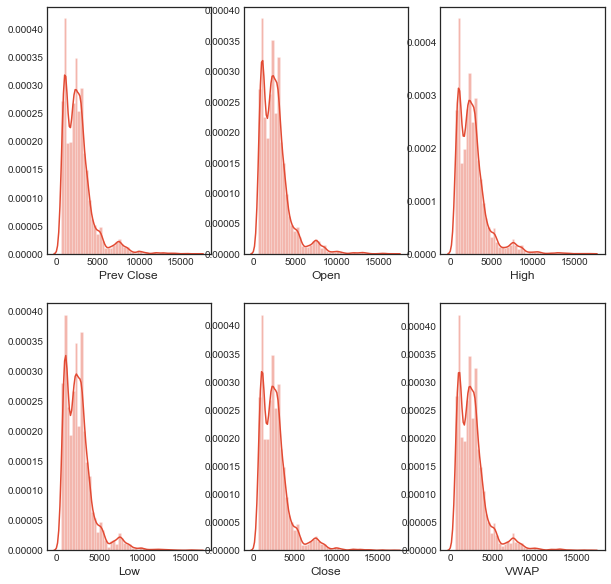

In [8]:
#Size and style of the plot
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Subplots of distplot
plt.subplot(231)
sns.distplot(df_analysis['Prev Close'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(df_analysis['Open'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(df_analysis['High'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(df_analysis['Low'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(df_analysis['Close'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(df_analysis['VWAP'])
fig = plt.gcf()
fig.set_size_inches(10,10)

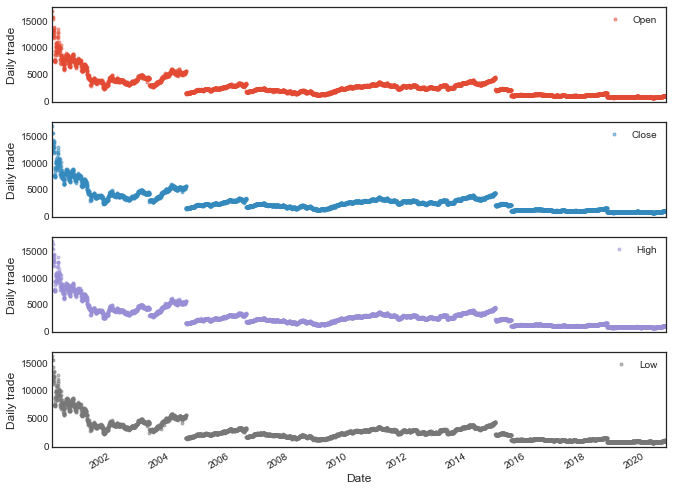

In [9]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = df_analysis[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')


### Data Transformation

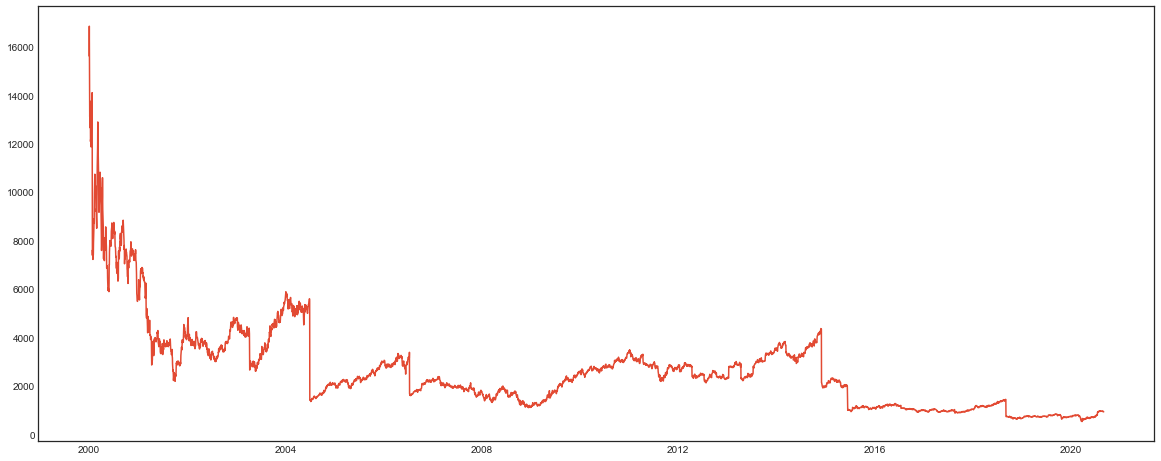

In [10]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%m/%d/%Y')
df.index = df['Date']

#plot
plt.figure(figsize=(20,8))
plt.plot(df['Close'], label='Historical Close Price')

In [11]:
features = ["Date", "Close"]
all_data = df[features]

In [12]:
#setting index
all_data.index = all_data.Date
all_data.drop('Date', axis=1, inplace=True)

In [13]:
all_data.head()

,Close
Date,
2000-01-03,15625.20
2000-01-04,16855.90
2000-01-05,15507.45
2000-01-06,14266.85
2000-01-07,13125.50


In [14]:
all_data.shape

(5141, 1)

### Non randomized Train-Test Split to preserve Serial Nature

In [15]:
#creating training and validation sets
dataset = all_data.values

train = dataset[0:4500,:]
valid = dataset[4500:,:]

#### Scaling

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [17]:
x_train, y_train = [], []
for i in range(90,len(train)):
    x_train.append(scaled_data[i-90:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

### Building and Training a Stacked LSTM(Long Short Term Memory) Recurrent Neural Network

In [19]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences = False))
model.add(Dropout(rate = 0.2))

model.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



TypeError: The added layer must be an instance of class Layer. Found: <keras.layers.core.Dropout object at 0x000001B8E42E6908>

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1)

In [ ]:
#predicting test data values, using past 90 from the train data
inputs = all_data[len(all_data) - len(valid)-90:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [ ]:
inputs.shape

In [ ]:
X_test = []
for i in range(90,inputs.shape[0]):
    X_test.append(inputs[i-90:i,0])
X_test = np.array(X_test)


In [ ]:
X_test.shape

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
preds = model.predict(X_test)
preds = scaler.inverse_transform(preds)

### Root Mean Square Evaluation

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-preds),2)))
print(f"Root Mean Square Error:{rms}")

### Visualize Prediction using matplotlib

In [ ]:
#for plotting
train = all_data[0:4500]
valid = all_data[4500:]
valid['Predictions'] = preds
plt.figure(figsize=(20,8))
plt.plot(train['Close'])
plt.plot(valid['Close'], color = 'blue', label = 'Real Price')
plt.plot(valid['Predictions'], color = 'orange', label = 'Predicted Price')
plt.title('INFOSYS Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Infosys Stock Price')
plt.legend()
plt.show()

### Clear Visualisation

In [ ]:
# Visualising the results
plt.plot(valid['Close'], color = 'blue', label = 'Real  Stock Price')
plt.plot(valid['Predictions'], color = 'orange', label = 'Predicted  Stock Price')
plt.title('Infosys Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Infosys Stock Price')
plt.legend()
plt.show()